In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


#from sklearn import datasets
from sklearn.model_selection import cross_val_score # for cross validation purpose
from sklearn.model_selection import cross_validate # for cross validation and multiple evaluation
from sklearn.metrics import confusion_matrix
#%reload_ext memory_profiler

In [2]:
cars_data =  pd.read_csv('Span_new.csv')
cars_data.head()

,Unnamed: 0,ID,make,model,months_old,power,gear,fuel_type,kms,price,age
0,0,97860,Porsche,911,240,210,manual,gasoline,202000,999999,1998
1,1,27821,Ford,Mustang,54,487,manual,gasoline,30000,685000,2013
2,2,97801,Porsche,911,358,220,manual,gasoline,56300,555555,1988
3,3,98251,Porsche,911,14,368,manual,gasoline,2800,470000,2016
4,4,98250,Porsche,911,3,515,unknown,gasoline,10,450000,2017


### Exploratory data analysis

In [3]:
cars_data = cars_data.drop_duplicates()
cars_data = cars_data.dropna()
cars_data = cars_data.drop(['Unnamed: 0', 'ID'], axis = 1)
cars_data = cars_data.rename({'age' : 'model_year'}, axis = 1)
cars_data = cars_data[(cars_data.gear == 'manual') | (cars_data.gear == 'automatic')]
cars_data.shape

(90859, 9)

#### maping gear column
    0=manual
    1=automatic

In [4]:
cars_data.gear = cars_data.gear.map({'manual':0, 'automatic':1})

In [5]:
cars_data.head()

,make,model,months_old,power,gear,fuel_type,kms,price,model_year
0,Porsche,911,240,210,0,gasoline,202000,999999,1998
1,Ford,Mustang,54,487,0,gasoline,30000,685000,2013
2,Porsche,911,358,220,0,gasoline,56300,555555,1988
3,Porsche,911,14,368,0,gasoline,2800,470000,2016
5,Porsche,911,17,368,0,gasoline,145,445000,2016


In [6]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90859 entries, 0 to 92384
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   make        90859 non-null  object
 1   model       90859 non-null  object
 2   months_old  90859 non-null  int64 
 3   power       90859 non-null  int64 
 4   gear        90859 non-null  int64 
 5   fuel_type   90859 non-null  object
 6   kms         90859 non-null  int64 
 7   price       90859 non-null  int64 
 8   model_year  90859 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 6.9+ MB


In [7]:
cars_data.describe()

,months_old,power,gear,kms,price,model_year
count,90859.000000,90859.000000,90859.000000,90859.000000,90859.000000,90859.000000
mean,63.564897,99.869688,0.267172,82958.241880,16546.988411,2012.256287
std,56.857758,42.664967,0.442485,75302.005315,15544.181516,4.750462
min,1.000000,0.000000,0.000000,1.000000,200.000000,1987.000000
25%,16.000000,77.000000,0.000000,18440.500000,8500.000000,2009.000000
50%,46.000000,88.000000,0.000000,66000.000000,13400.000000,2014.000000
75%,97.000000,110.000000,1.000000,129000.000000,19995.000000,2016.000000
max,372.000000,809.000000,1.000000,497000.000000,999999.000000,2017.000000


### Dealing with outliers

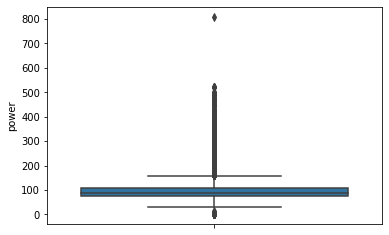

In [8]:
# power
sns.boxplot(y=cars_data.power, orient='v')
plt.show()

In [9]:
print(np.where(cars_data.power>600))

(array([28671]),)


In [10]:
cars_data = cars_data[cars_data.power <=600]

In [11]:
cars_data.head()

,make,model,months_old,power,gear,fuel_type,kms,price,model_year
0,Porsche,911,240,210,0,gasoline,202000,999999,1998
1,Ford,Mustang,54,487,0,gasoline,30000,685000,2013
2,Porsche,911,358,220,0,gasoline,56300,555555,1988
3,Porsche,911,14,368,0,gasoline,2800,470000,2016
5,Porsche,911,17,368,0,gasoline,145,445000,2016


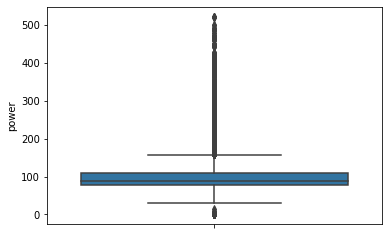

In [12]:
sns.boxplot(y=cars_data.power, orient='v')
plt.show()

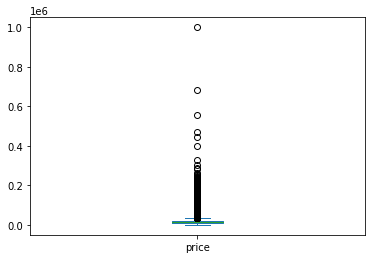

In [13]:
#price
cars_data.price.plot(kind='box')
plt.show()

In [14]:
cars_data.shape

(90858, 9)

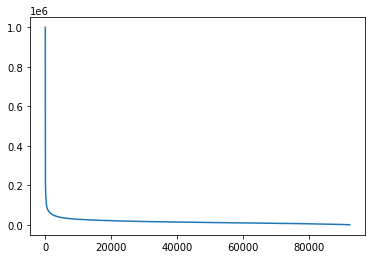

In [15]:
plt.plot(cars_data.price)
plt.show()

In [16]:
print(np.where(cars_data.price>35000))

(array([   0,    1,    2, ..., 5637, 5638, 5639]),)


In [17]:
cars_data = cars_data[cars_data.price < 35000]
cars_data.shape

(85154, 9)

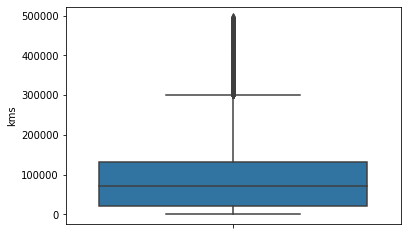

In [18]:
#kms
sns.boxplot(y=cars_data.kms, orient='v')
plt.show()

In [19]:
print(np.where(cars_data.kms>250000))

(array([  287,   436,  2894, ..., 85144, 85145, 85148]),)


In [20]:
cars_data = cars_data[cars_data.kms < 250000]
cars_data.shape

(82158, 9)

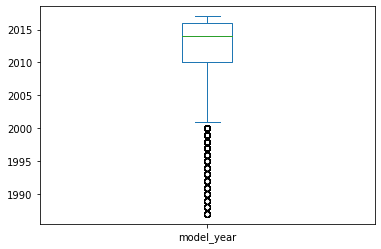

In [21]:
# model_year
cars_data.model_year.plot(kind='box')
plt.show()

In [22]:
print(np.where(cars_data.model_year< 1995))

(array([ 2787,  3282,  3302,  7028,  8255, 10819, 13514, 13532, 16767,
       17343, 18405, 19724, 21842, 22565, 23220, 23669, 28215, 30113,
       30469, 32864, 32878, 34381, 36024, 37096, 41153, 42692, 42693,
       42795, 42823, 42832, 42858, 44435, 44463, 44464, 44540, 45713,
       47373, 47936, 49094, 51732, 53470, 53497, 53557, 54074, 54730,
       54912, 55703, 56572, 56600, 56637, 56717, 56949, 57461, 58484,
       58654, 59613, 59615, 59646, 60683, 61636, 63271, 63320, 63396,
       63442, 63801, 63820, 64481, 65072, 65075, 65683, 66008, 66101,
       66368, 66386, 67560, 67659, 67814, 67870, 67996, 69752, 70024,
       70599, 71031, 71070, 71191, 71224, 71297, 71881, 72224, 72491,
       72554, 72683, 72777, 73790, 73819, 73829, 73852, 73875, 73940,
       74028, 74346, 74353, 74354, 74386, 74461, 74584, 74615, 74760,
       75004, 75301, 75336, 75401, 75433, 75435, 75466, 75752, 75756,
       75773, 75870, 76100, 76101, 76102, 76103, 76104, 76473, 76519,
       76599, 76673

In [23]:
cars_data = cars_data[cars_data.model_year > 2000]
cars_data.shape

(80796, 9)

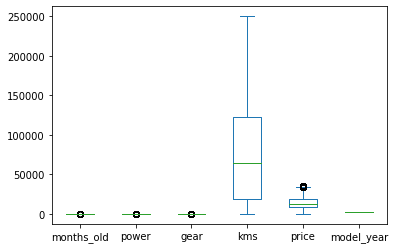

In [24]:
cars_data.plot(kind='box')
plt.show()

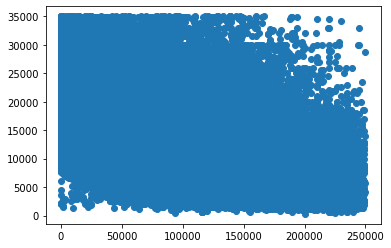

In [25]:
plt.scatter(cars_data.kms, cars_data.price)
plt.show()

In [26]:
cars_data.describe()

,months_old,power,gear,kms,price,model_year
count,80796.000000,80796.000000,80796.000000,80796.000000,80796.000000,80796.000000
mean,59.006411,93.489443,0.226088,77073.259963,14292.221892,2012.641443
std,49.069158,30.741127,0.418299,64264.010788,7449.844130,4.103335
min,1.000000,0.000000,0.000000,1.000000,300.000000,2001.000000
25%,16.000000,74.000000,0.000000,19000.000000,8750.000000,2010.000000
50%,45.000000,88.000000,0.000000,65000.000000,12995.000000,2014.000000
75%,91.000000,110.000000,0.000000,122000.000000,18900.000000,2016.000000
max,204.000000,375.000000,1.000000,249862.000000,34999.000000,2017.000000


### Standardize the data

In [27]:
variables_in_study = cars_data[['months_old', 'power','kms','price', 'model_year']]

scaler = StandardScaler()
scaler.fit(variables_in_study)
variables_in_study = scaler.transform(variables_in_study)

variables_in_study = pd.DataFrame(variables_in_study, columns = ['months_old', 'power','kms','price', 'model_year'])
independent_variables = variables_in_study[['months_old', 'power', 'kms', 'price', 'model_year']].reset_index(drop=True)
dependent_variable = cars_data.gear.reset_index(drop=True)

### Split the data - Cross Validation

#### General Split

In [28]:
#%%memit
# focusing on numerical data only

x_train, x_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, test_size=0.2, shuffle = True)
print('cars_data shape is: ', cars_data.shape)
print('x_train shape is: ',x_train.shape)
print('x_test shape is: ',x_test.shape)
print('y_train shape is: ',y_train.shape)
print('y_test shape is: ',y_test.shape)

cars_data shape is:  (80796, 9)
x_train shape is:  (64636, 5)
x_test shape is:  (16160, 5)
y_train shape is:  (64636,)
y_test shape is:  (16160,)


#### K-Fold Split

In [29]:
kf = KFold(n_splits = 5)
for train_index, test_index in kf.split(independent_variables, dependent_variable):
    x_train, x_test, y_train, y_test = independent_variables.iloc[train_index], independent_variables.iloc[test_index], dependent_variable.iloc[train_index], dependent_variable.iloc[test_index]
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(64636, 5) (16160, 5) (64636,) (16160,)
(64637, 5) (16159, 5) (64637,) (16159,)
(64637, 5) (16159, 5) (64637,) (16159,)
(64637, 5) (16159, 5) (64637,) (16159,)
(64637, 5) (16159, 5) (64637,) (16159,)


In [30]:
print('cars_data shape is: ', cars_data.shape)
print('x_train shape is: ',x_train.shape)
print('x_test shape is: ',x_test.shape)
print('y_train shape is: ',y_train.shape)
print('y_test shape is: ',y_test.shape)

cars_data shape is:  (80796, 9)
x_train shape is:  (64637, 5)
x_test shape is:  (16159, 5)
y_train shape is:  (64637,)
y_test shape is:  (16159,)


#### Stratified Fold Splits

In [31]:
from sklearn.model_selection import StratifiedKFold
stratified_folds = StratifiedKFold(n_splits = 5, shuffle=True)

for train_index, test_index in stratified_folds.split(independent_variables, dependent_variable):
    x_train, x_test, y_train, y_test = independent_variables.iloc[train_index], independent_variables.iloc[test_index], dependent_variable.iloc[train_index], dependent_variable.iloc[test_index]
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(64636, 5) (16160, 5) (64636,) (16160,)
(64637, 5) (16159, 5) (64637,) (16159,)
(64637, 5) (16159, 5) (64637,) (16159,)
(64637, 5) (16159, 5) (64637,) (16159,)
(64637, 5) (16159, 5) (64637,) (16159,)


<img src=classification_algorithms.png height=600 width=800>


### Evaluation Criteria

In [32]:
accuracy_score_list = []

def classfication_evaluation(prediction, y_test):
    #%memit
    
    actual_predicted = pd.DataFrame(data= [prediction, y_test], index = ['predicted_value', 'actual_value']).transpose()
    cm = metrics.confusion_matrix(actual_predicted.actual_value, actual_predicted.predicted_value)
    accuracy_score = metrics.accuracy_score(actual_predicted.actual_value, actual_predicted.predicted_value)
    print('\n accuracy score \t\t', accuracy_score)
    accuracy_score_list.append(accuracy_score)
    print('\n confusion matrix', cm, sep = '\n\n')
    print('\n\n', metrics.classification_report(actual_predicted.actual_value, actual_predicted.predicted_value))
    
    tp, fn, fp, tn = confusion_matrix(actual_predicted.actual_value, actual_predicted.predicted_value).ravel()
    print('Number of true positives are :',tp)
    print('Number of false negatives are :',fn)
    print('Number of false positives are :',fp)
    print('Number of true negatives are :',tn)
    
    
    # draw heatmap of confusion matrix
    sns.heatmap(cm, annot=True, square=True, annot_kws = {'wrap': False ,'size': 15, 'rotation': 45},
            fmt='g',
            xticklabels=['manual', 'automatic'],
            yticklabels=['manual', 'automatic'],
            robust = True,
            cmap="YlGnBu",
            linewidths=5, linecolor='grey',
            cbar=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix', fontdict={'fontsize': 15}, pad = 15)
    

### ROC (_Receive Operating Charcteristic_) Curve and AUC

https://www.youtube.com/watch?v=4jRBRDbJemM

ROC curves are normally drawn in terms of sensitivity (also called true positive rate, TPR). 1 − specificity is called the false positive rate (FPR). Remember, these both measure performance with respect to the breakdown in the real world. That is, they care how we do based on what is out there in reality. We want to have a high TPR: 1.0 is perfect. We want a low FPR: 0.0 is great. We’ve already seen that we can game the system and guarantee a high TPR by making the prediction bar so low that we say everyone is positive. But what does that do to our FPR? Exactly! It sends it up to one: fail. The opposite case — cheating towards saying no one is sick— gets us a great FPR of zero.

$True Positive Rate = Sensitivity / Recall = \frac{True Positive} {True Positive + False Negative}$ _(Out of total acutal positives, how many positives are predicted correctly)_.

$Specificity = \frac{True Negative} {False Positive + True Negative}$ _(Out of total actual negatives, how many negatives are predicted correctly)_.

$False Positive Rate = 1 - Specificity$

ROC is plotting of True Positve Rate against False Positive rate. Target is to get 1 true positive rate and 0 false positive rate.


<img src="confusion_matrix.png" width=400 height=400>
<img src="auc1.png" width=450 height=450>
<img src="auc2.png" width=450 height=450>
<img src="auc3.png" width=450 height=450>


In [33]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

auc_list = []
fpr_list =[]
tpr_list = []
model_list=[]

def get_roc(y_test, prediction, model):
    model_fpr, model_tpr, threshold = roc_curve(y_test, prediction)
    auc_model = auc(model_fpr, model_tpr)
    auc_list.append(auc_model)
    fpr_list.append(model_fpr)
    tpr_list.append(model_tpr)
    model_list.append(model())
    print()
    print(f'AUC of {model()} is: ', auc_model)
    plt.figure(figsize=[2.5,2.5], dpi=200)
    plt.plot(model_fpr, model_tpr, linestyle = '-.', marker = '.', label = f'{model()} (auc=%0.3f)' %auc_model)
    plt.xlabel('False Positive Rate -->',fontsize=7 )
    plt.ylabel('True Positive Rate -->',fontsize=7)
    plt.legend(loc = 'lower right', fontsize=4.5)
    plt.show()


### Applying classification methods with K-Fold cross validation

In [34]:
models_list = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, SVC, KNeighborsClassifier, GaussianNB]

In [35]:
average_accuracy_list = []
def classification_algorithm(model, IVs, DV):
    '''Model name should be provided in non-string format e.g. LogisticRegression or DecisionTreeClassifier '''    
    for i,(train_index, test_index) in enumerate(stratified_folds.split(independent_variables, dependent_variable)):
        x_train, x_test, y_train, y_test = independent_variables.iloc[train_index], independent_variables.iloc[test_index], dependent_variable.iloc[train_index], dependent_variable.iloc[test_index]
        print('\n \n')
        print(f'***~~~now applying {model()} classification algorithm with Fold {i+1}~~~***')
        reg = model()
        reg = reg.fit(x_train, y_train)
        prediction = reg.predict(x_test)
        classfication_evaluation(prediction, y_test)
        get_roc(y_test, prediction, model)
        
    print('Accuracy scores are: ', accuracy_score_list)
    average_accuracy = np.mean(accuracy_score_list)
    average_accuracy_list.append(average_accuracy)
    print('Average of accuracy scores is: ', average_accuracy)
    print('Average accuracy list values is/are: ', average_accuracy_list)
    print('Now emptying the accuracy score list, average accuracy list and model list')
    accuracy_score_list.clear()
    average_accuracy_list
    model_list.clear()

In [36]:
#classification_algorithm(DecisionTreeClassifier, independent_variables, dependent_variable)

In [37]:
# for i in models_list:
#     classification_algorithm(i, independent_variables, dependent_variable)

In [38]:
models_list_text = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'SVC', 'KNeighborsClassifier', 'GaussianNB']

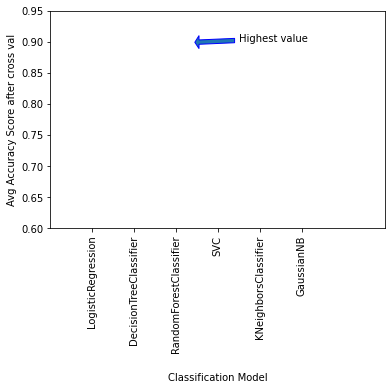

In [39]:
plt.plot(average_accuracy_list, marker="o", color="green")
#plt.xlabel(models_list)
plt.xticks(ticks = np.arange(len(models_list)), labels=models_list_text, rotation= 90)
for index, value in enumerate(average_accuracy_list):
#     print(index)
#     print(value)
    plt.text(index, value+0.020, "%.3f" %value, ha="center")

#plt.tight_layout()
plt.annotate('Highest value', (3.5,0.90))
plt.arrow(3.4,0.902, -0.85,-0.0025, width = 0.007, head_length=0.10, ec='blue')
plt.xlim(-1,7)
plt.ylim(0.60,0.95)
plt.xlabel("Classification Model", labelpad=20)
plt.ylabel("Avg Accuracy Score after cross val")
plt.show()

## Applying classification methods seperately

### Logistic Regression

#### Method 1

In [40]:
reg = LogisticRegression()
reg = reg.fit(x_train, y_train)
prediction = reg.predict(x_test)

In [41]:
reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [42]:
reg.predict_proba(x_test)

array([[0.0224265 , 0.9775735 ],
       [0.08921598, 0.91078402],
       [0.26985913, 0.73014087],
       ...,
       [0.96905564, 0.03094436],
       [0.92046967, 0.07953033],
       [0.97062194, 0.02937806]])


 accuracy score 		 0.8324153722383811

 confusion matrix

[[11807   699]
 [ 2009  1644]]


               precision    recall  f1-score   support

           0       0.85      0.94      0.90     12506
           1       0.70      0.45      0.55      3653

    accuracy                           0.83     16159
   macro avg       0.78      0.70      0.72     16159
weighted avg       0.82      0.83      0.82     16159

Number of true positives are : 11807
Number of false negatives are : 699
Number of false positives are : 2009
Number of true negatives are : 1644


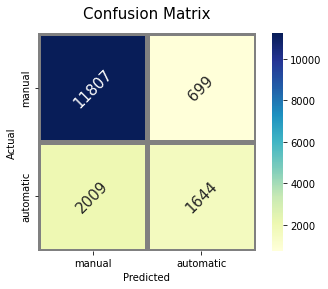

In [43]:
classfication_evaluation(prediction, y_test)


AUC of LogisticRegression() is:  0.6970739454314597


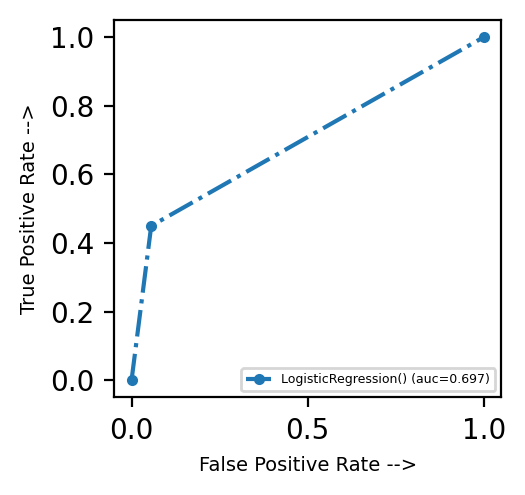

In [44]:
get_roc(y_test, prediction, LogisticRegression)

#### Method 2

In [45]:
regression_model = sm.Logit(y_train, x_train)
results = regression_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.577938
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   gear   No. Observations:                64637
Model:                          Logit   Df Residuals:                    64632
Method:                           MLE   Df Model:                            4
Date:                Thu, 12 May 2022   Pseudo R-squ.:                -0.08124
Time:                        12:22:42   Log-Likelihood:                -37356.
converged:                       True   LL-Null:                       -34549.
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
months_old     0.7991      0.121      6.628      0.000       0.563       1.035
power          0.6247      0.017     37.816      0.000       0.592       0.657
kms            0.1552      0.016      9.819      0.000       0.124       0.186
price          0.7744      0.018     43.135      0.000       0.739       0.810
model_year     0.5803      0.120      4.840      0.000       0.345       0.815
==============================================================================
"""

In [46]:
prediction = results.predict(x_test)
prediction = pd.Series(map(round, prediction))
y_test_logit = y_test.reset_index(drop=True)
#print(y_test_logit.head())


 accuracy score 		 0.7121727829692431

 confusion matrix

[[8551 3955]
 [ 696 2957]]


               precision    recall  f1-score   support

           0       0.92      0.68      0.79     12506
           1       0.43      0.81      0.56      3653

    accuracy                           0.71     16159
   macro avg       0.68      0.75      0.67     16159
weighted avg       0.81      0.71      0.74     16159

Number of true positives are : 8551
Number of false negatives are : 3955
Number of false positives are : 696
Number of true negatives are : 2957


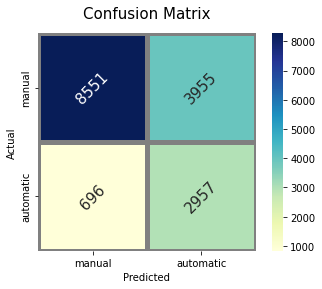

In [47]:
classfication_evaluation(prediction, y_test_logit)


AUC of LogisticRegression() is:  0.7466117331296637


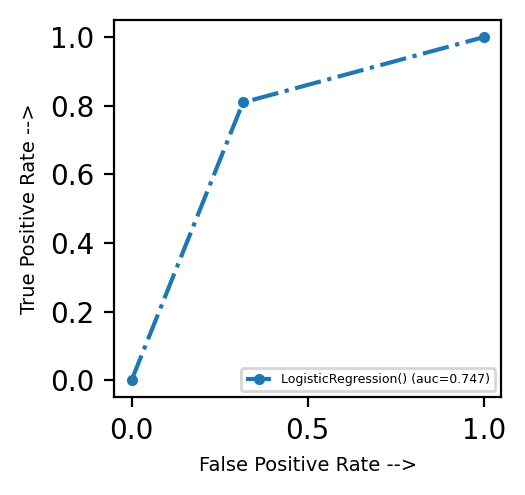

In [48]:
get_roc(y_test, prediction, LogisticRegression)

### Decision Tree

In [49]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
dtc.fit(x_train, y_train)
prediction = dtc.predict(x_test)

In [50]:
text_representation = tree.export_text(dtc)
print(text_representation)


|--- feature_1 <= 0.20
|   |--- feature_3 <= 0.62
|   |   |--- feature_3 <= -0.47
|   |   |   |--- feature_0 <= -0.48
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -0.48
|   |   |   |   |--- class: 0
|   |   |--- feature_3 >  -0.47
|   |   |   |--- feature_2 <= -1.19
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  -1.19
|   |   |   |   |--- class: 0
|   |--- feature_3 >  0.62
|   |   |--- feature_1 <= -0.39
|   |   |   |--- feature_1 <= -0.42
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -0.42
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  -0.39
|   |   |   |--- feature_2 <= -1.20
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  -1.20
|   |   |   |   |--- class: 0
|--- feature_1 >  0.20
|   |--- feature_1 <= 1.24
|   |   |--- feature_3 <= 1.48
|   |   |   |--- feature_3 <= 0.47
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.47
|   |   |   |   |--- class: 0
|   |   |--- feature_3 >  1.48
|   |   |   |--- feature_

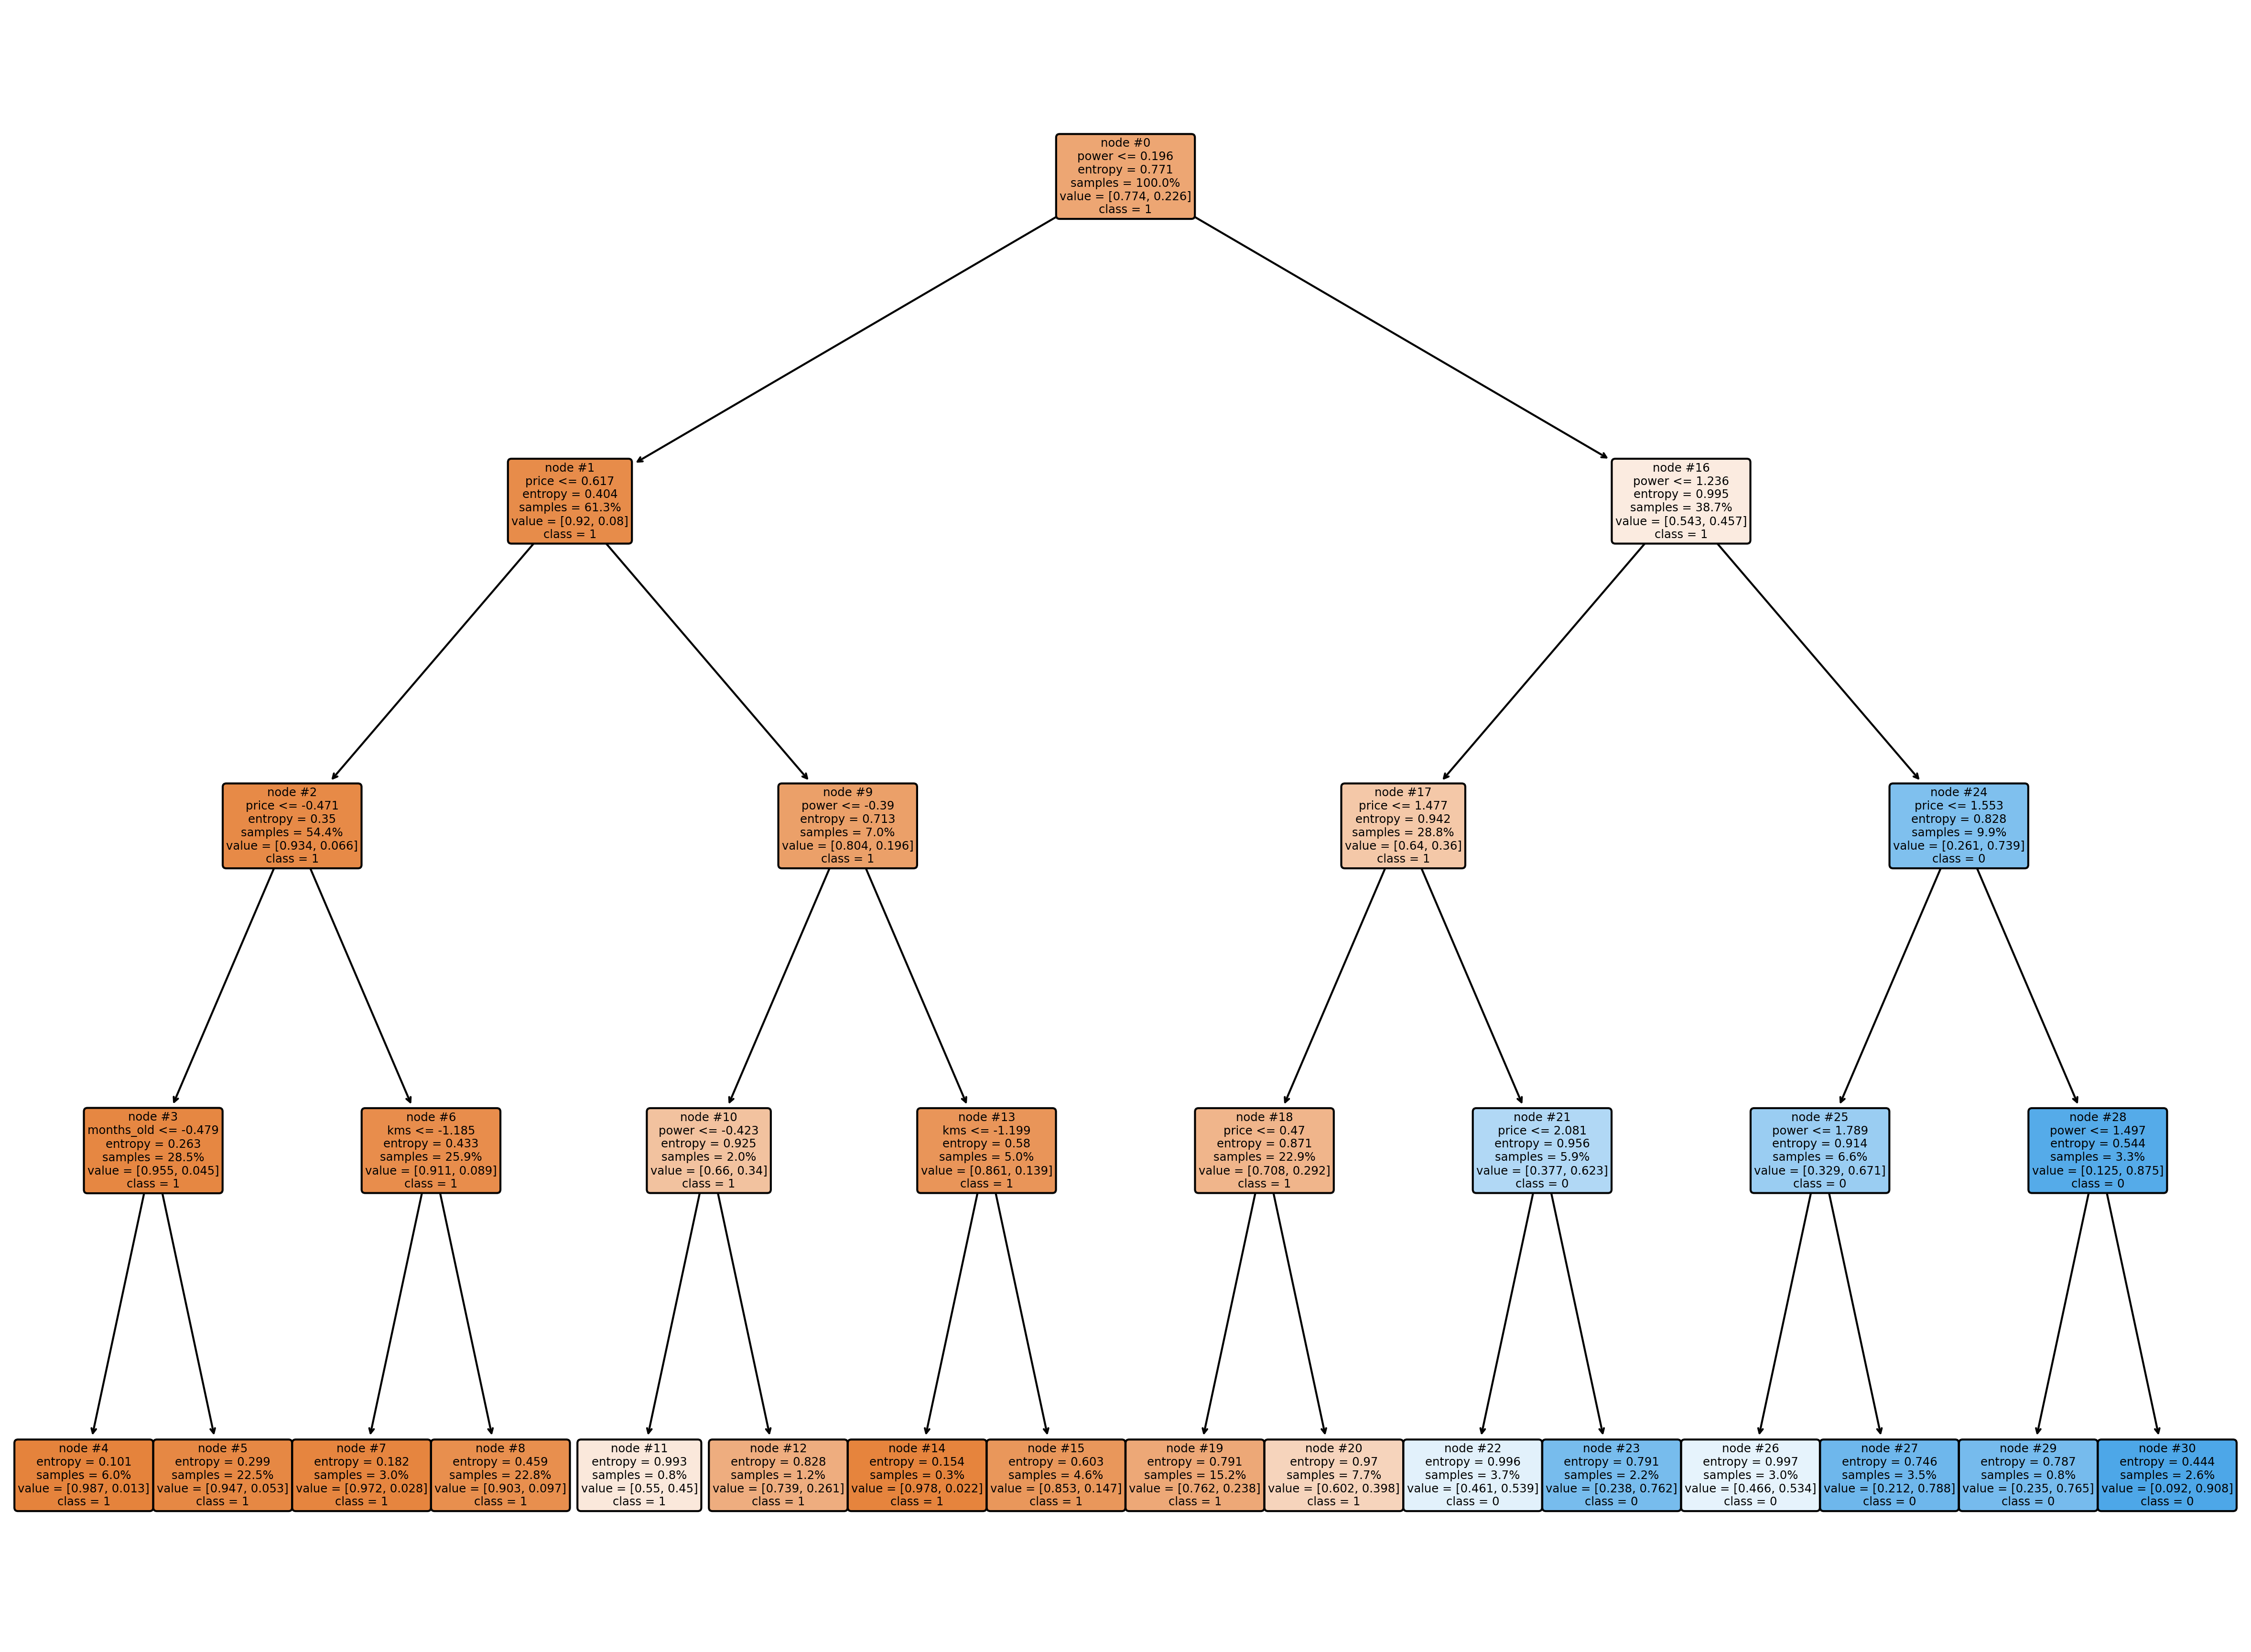

In [51]:
features_names = ['months_old', 'power', 'kms', 'price', 'model_year'] # must be in string format
classes_names = ["1","0"] # must be in string format


plt.figure(figsize=(20, 15), dpi=300)
tree.plot_tree(dtc, feature_names=features_names, class_names=classes_names, filled=True, 
               impurity=True, node_ids=True, proportion =True, rounded=True)
plt.savefig('decision_tree_car.png', dpi= 600)
plt.show()

In [52]:
pip install dtreeviz

You should consider upgrading via the '/home/a/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/home/a/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


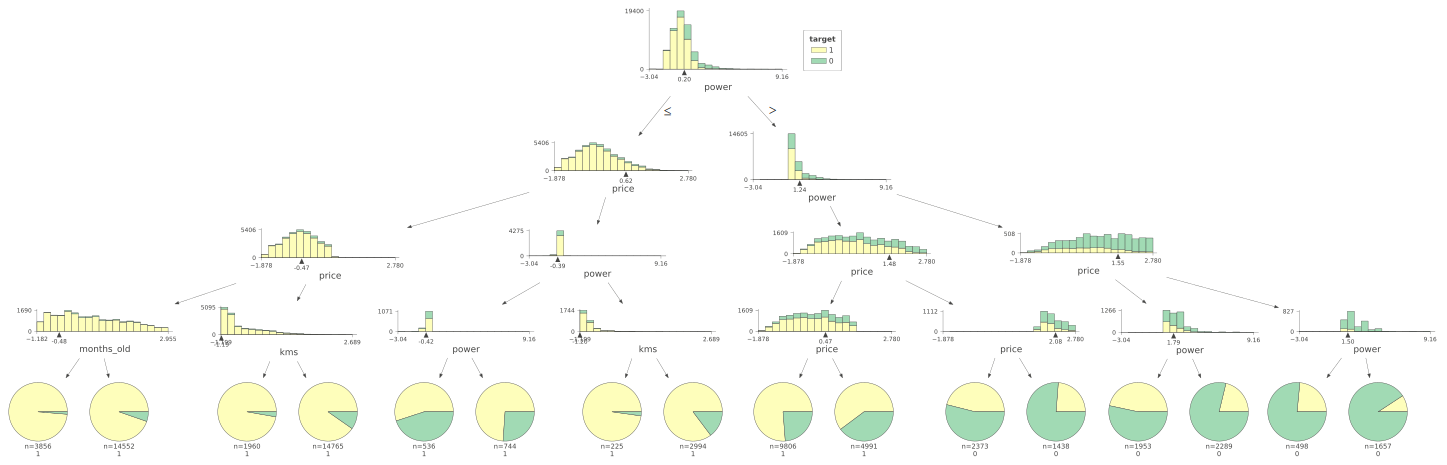

In [53]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(dtc, x_train, y_train,
                target_name="target",
                feature_names=features_names,
                class_names=classes_names)


viz.save("decision_tree.svg")
viz


 accuracy score 		 0.8300637415681663

 confusion matrix

[[11692   814]
 [ 1932  1721]]


               precision    recall  f1-score   support

           0       0.86      0.93      0.89     12506
           1       0.68      0.47      0.56      3653

    accuracy                           0.83     16159
   macro avg       0.77      0.70      0.73     16159
weighted avg       0.82      0.83      0.82     16159

Number of true positives are : 11692
Number of false negatives are : 814
Number of false positives are : 1932
Number of true negatives are : 1721
341 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


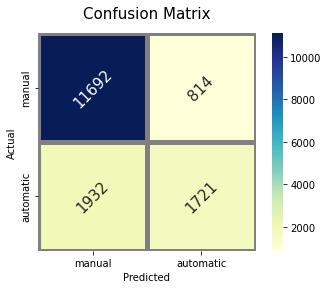

In [54]:
%%timeit -n1 -r1
classfication_evaluation(prediction, y_test)


AUC of DecisionTreeClassifier() is:  0.7030154351534039


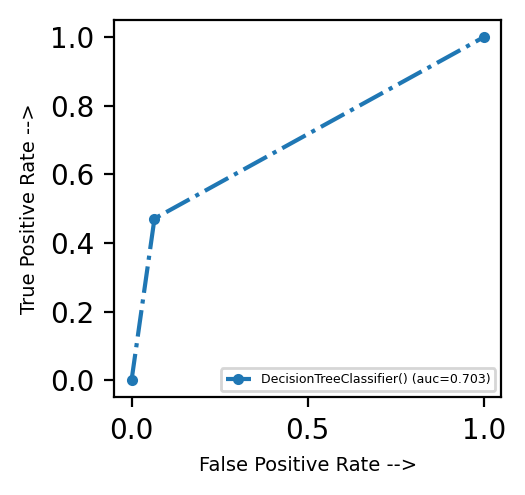

In [55]:
get_roc(y_test, prediction, DecisionTreeClassifier)

### Random Forest

In [56]:
rfc = RandomForestClassifier(n_estimators = 10)
rfc.fit(x_train, y_train)
prediction = rfc.predict(x_test)

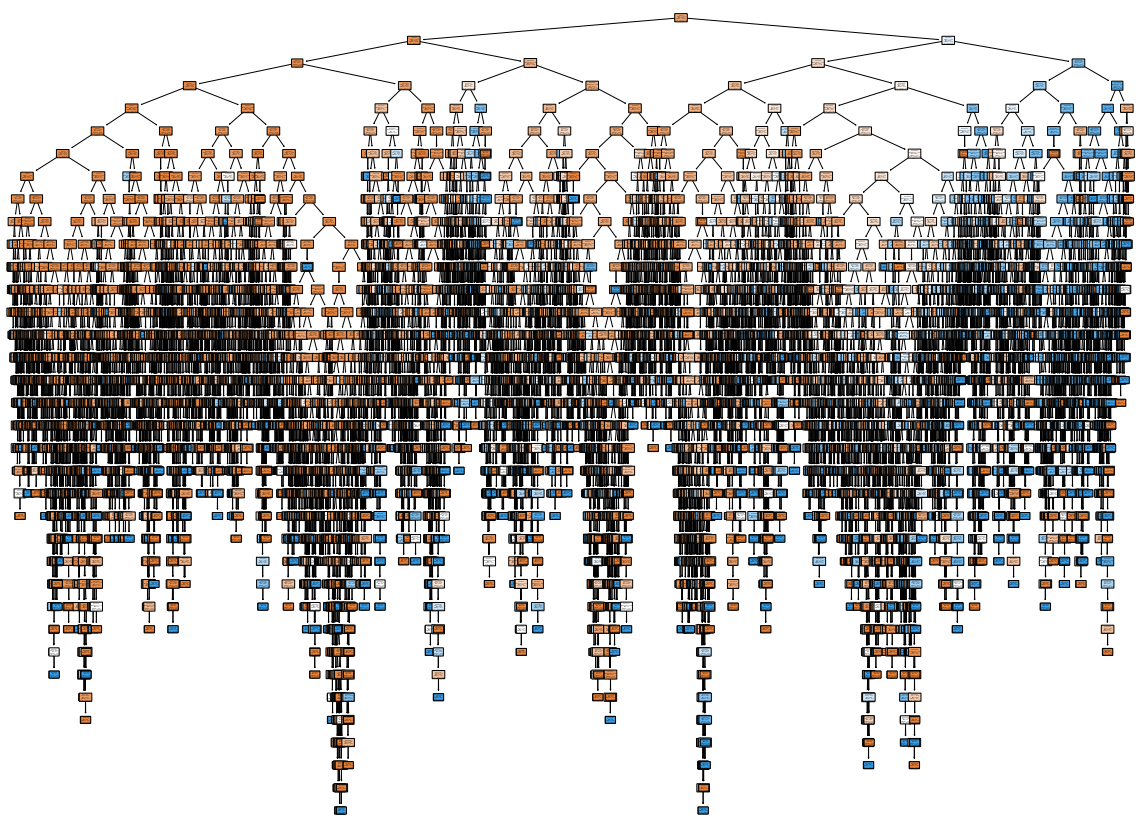

In [57]:
features_names = ['months_old', 'power', 'kms', 'price', 'model_year'] # must be in string format
classes_names = ["1","0"] # must be in string format


plt.figure(figsize=(20, 15))
tree.plot_tree(rfc.estimators_[1], feature_names=features_names, class_names=classes_names, filled=True, 
               impurity=True, node_ids=True, proportion =True, rounded=True)
plt.savefig('random_forest_car.png', dpi= 300)
plt.show()


 accuracy score 		 0.8691750727148957

 confusion matrix

[[11849   657]
 [ 1457  2196]]


               precision    recall  f1-score   support

           0       0.89      0.95      0.92     12506
           1       0.77      0.60      0.68      3653

    accuracy                           0.87     16159
   macro avg       0.83      0.77      0.80     16159
weighted avg       0.86      0.87      0.86     16159

Number of true positives are : 11849
Number of false negatives are : 657
Number of false positives are : 1457
Number of true negatives are : 2196
302 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


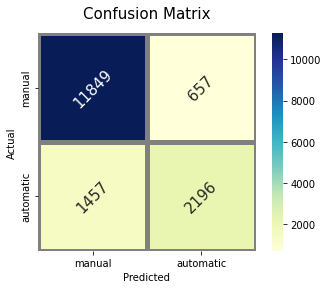

In [58]:
%%timeit -n1 -r1
classfication_evaluation(prediction, y_test)


AUC of RandomForestClassifier() is:  0.7743074783178807


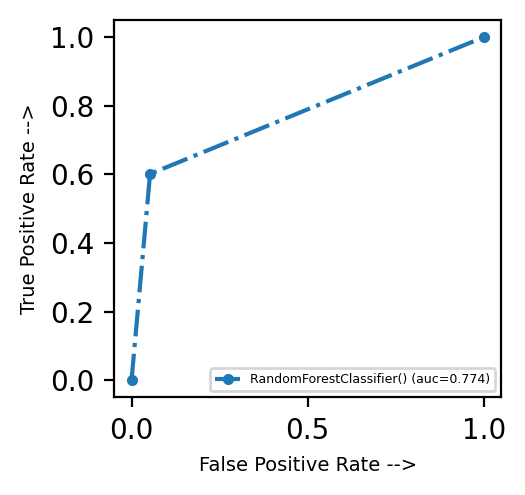

In [59]:
get_roc(y_test, prediction, RandomForestClassifier)

### Support Vector Machine 

In [60]:
svc = SVC()
svc.fit(x_train, y_train)
prediction = svc.predict(x_test)


 accuracy score 		 0.8356952781731543

 confusion matrix

[[11999   507]
 [ 2148  1505]]


               precision    recall  f1-score   support

           0       0.85      0.96      0.90     12506
           1       0.75      0.41      0.53      3653

    accuracy                           0.84     16159
   macro avg       0.80      0.69      0.72     16159
weighted avg       0.83      0.84      0.82     16159

Number of true positives are : 11999
Number of false negatives are : 507
Number of false positives are : 2148
Number of true negatives are : 1505
314 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


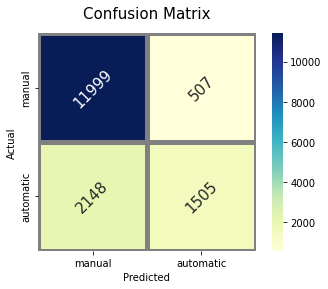

In [61]:
%%timeit -n1 -r1
classfication_evaluation(prediction, y_test)


AUC of SVC() is:  0.6857248022728449


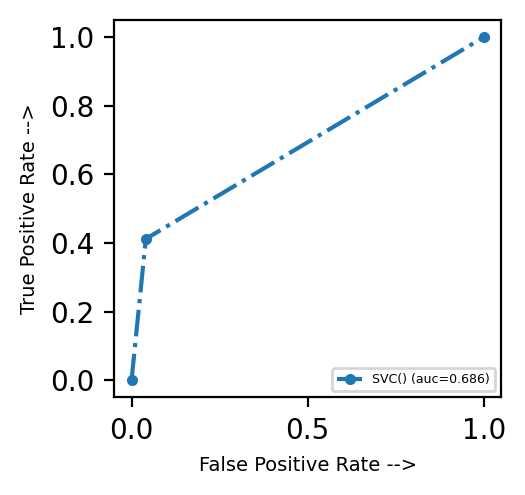

In [62]:
get_roc(y_test, prediction, SVC)

### K Nearest Neighbors 

In [63]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)


 accuracy score 		 0.8464632712420324

 confusion matrix

[[11532   974]
 [ 1507  2146]]


               precision    recall  f1-score   support

           0       0.88      0.92      0.90     12506
           1       0.69      0.59      0.63      3653

    accuracy                           0.85     16159
   macro avg       0.79      0.75      0.77     16159
weighted avg       0.84      0.85      0.84     16159

Number of true positives are : 11532
Number of false negatives are : 974
Number of false positives are : 1507
Number of true negatives are : 2146
307 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


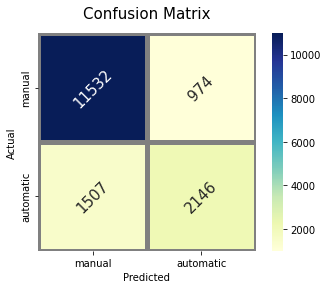

In [64]:
%%timeit -n1 -r1
classfication_evaluation(prediction, y_test)


AUC of KNeighborsClassifier() is:  0.7547898716800988


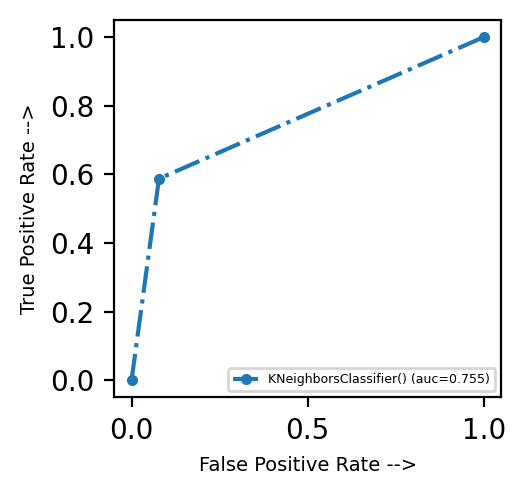

In [65]:
get_roc(y_test, prediction, KNeighborsClassifier)

### Naive Bayes

In [66]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
prediction = gnb.predict(x_test)


 accuracy score 		 0.8285785011448729

 confusion matrix

[[11548   958]
 [ 1812  1841]]


               precision    recall  f1-score   support

           0       0.86      0.92      0.89     12506
           1       0.66      0.50      0.57      3653

    accuracy                           0.83     16159
   macro avg       0.76      0.71      0.73     16159
weighted avg       0.82      0.83      0.82     16159

Number of true positives are : 11548
Number of false negatives are : 958
Number of false positives are : 1812
Number of true negatives are : 1841
307 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


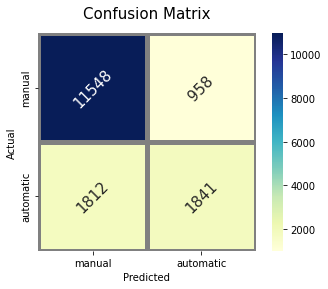

In [67]:
%%timeit -n1 -r1
classfication_evaluation(prediction, y_test)


AUC of GaussianNB() is:  0.7136830549094442


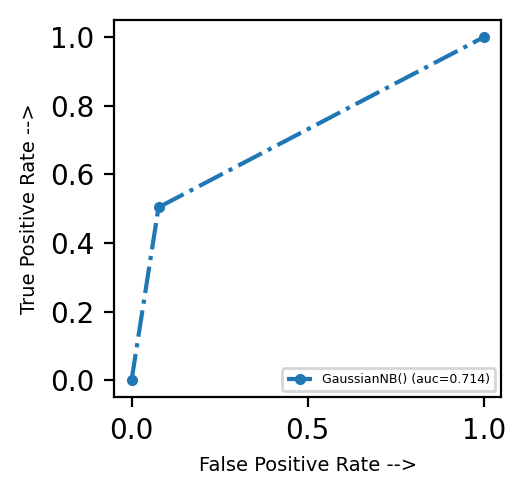

In [68]:
get_roc(y_test, prediction, GaussianNB)

### Model Comparison

In [69]:
accuracy_score_list

[0.8324153722383811,
 0.7121727829692431,
 0.8300637415681663,
 0.8691750727148957,
 0.8356952781731543,
 0.8464632712420324,
 0.8285785011448729]

In [70]:
models_list = ['Logistic Regression1', 'Logistic Regression2', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'K Nearest Neighbors', 'Naive Bayes' ]
models_list

['Logistic Regression1',
 'Logistic Regression2',
 'Decision Tree',
 'Random Forest',
 'Support Vector Machine',
 'K Nearest Neighbors',
 'Naive Bayes']

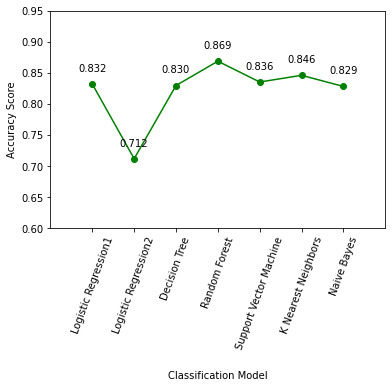

In [71]:
plt.plot(accuracy_score_list, marker="o", color="green")
#plt.xlabel(models_list)
plt.xticks(ticks = [0,1,2,3,4,5,6], labels=models_list, rotation= 70)
for index, value in enumerate(accuracy_score_list):
#     print(index)
#     print(value)
    plt.text(index, value+0.020, "%.3f" %value, ha="center")

#plt.tight_layout()
plt.xlim(-1,7)
plt.ylim(0.60,0.95)
plt.xlabel("Classification Model", labelpad=20)
plt.ylabel("Accuracy Score")
plt.show()

In [72]:
np.max(accuracy_score_list)

0.8691750727148957

In [73]:
np.argmax(accuracy_score_list)

3

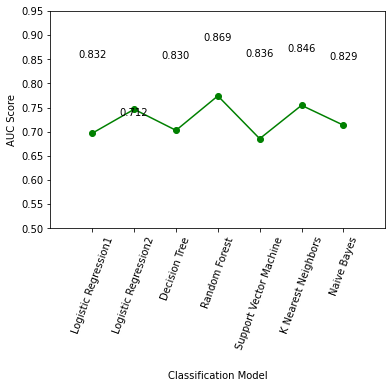

In [74]:
plt.plot(auc_list, marker="o", color="green")
#plt.xlabel(models_list)
plt.xticks(ticks = [0,1,2,3,4,5,6], labels=models_list, rotation= 70)
for index, value in enumerate(accuracy_score_list):
#     print(index)
#     print(value)
    plt.text(index, value+0.020, "%.3f" %value, ha="center")

#plt.tight_layout()
plt.xlim(-1,7)
plt.ylim(0.50,0.95)
plt.xlabel("Classification Model", labelpad=20)
plt.ylabel("AUC Score")
plt.show()

#### Composite AUC plots

In [75]:
np.max(auc_list)

0.7743074783178807

In [76]:
model_list

[LogisticRegression(),
 LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 SVC(),
 KNeighborsClassifier(),
 GaussianNB()]

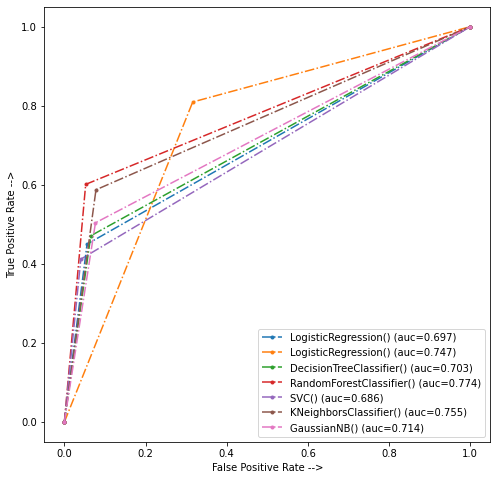

In [77]:
plt.figure(figsize=(8,8))
for i,j,k,l in zip(fpr_list, tpr_list, model_list, auc_list):
    plt.plot(i, j, linestyle = '-.', marker = '.', label = f'{k} (auc=%0.3f)' %l)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

In [78]:
# from sklearn.model_selection import StratifiedKFold
# stratified_folds = StratifiedKFold(n_splits = 5, shuffle=True)

# for train_index, test_index in stratified_folds.split(independent_variables, dependent_variable):
#     x_train, x_test, y_train, y_test = independent_variables.iloc[train_index], independent_variables.iloc[test_index], dependent_variable.iloc[train_index], dependent_variable.iloc[test_index]
    
#     # Applying logistic regression method 1
#     reg = LogisticRegression()
#     reg = reg.fit(x_train, y_train)
#     prediction = reg.predict(x_test)
#     classfication_evaluation(prediction, y_test)
#     get_roc(y_test, prediction, 'Logistic Regression 1')
    
#     # Applying logistic regression method 2
#     regression_model = sm.Logit(y_train, x_train)
#     results = regression_model.fit()
#     results.summary()
#     prediction = results.predict(x_test)
#     prediction = pd.Series(map(round, prediction))
#     y_test_logit = y_test.reset_index(drop=True)
#     classfication_evaluation(prediction, y_test_logit)
#     get_roc(y_test, prediction, 'Logistic Regression 2')
    
#     # Applying decision tree
#     dtc = DecisionTreeClassifier()
#     dtc.fit(x_train, y_train)
#     prediction = dtc.predict(x_test)
#     classfication_evaluation(prediction, y_test)
#     get_roc(y_test, prediction, 'Decision Tree')
    
#     # Applying Random Forest
#     rfc = RandomForestClassifier()
#     rfc.fit(x_train, y_train)
#     prediction = rfc.predict(x_test)
#     classfication_evaluation(prediction, y_test)
#     get_roc(y_test, prediction, 'Random Forest')
    
    
#     # Applying support vector classifier
#     svc = SVC()
#     svc.fit(x_train, y_train)
#     prediction = svc.predict(x_test)
#     classfication_evaluation(prediction, y_test)
#     get_roc(y_test, prediction, 'Support Vector Machine')
    
#     # Applying KNN classifier
#     knn = KNeighborsClassifier()
#     knn.fit(x_train, y_train)
#     prediction = knn.predict(x_test)
#     classfication_evaluation(prediction, y_test)
#     get_roc(y_test, prediction, 'K Nearest Neighbors')
    
#     # Applying Naive Bays
#     gnb = GaussianNB()
#     gnb.fit(x_train, y_train)
#     prediction = gnb.predict(x_test)
#     classfication_evaluation(prediction, y_test)
#     get_roc(y_test, prediction, 'Naive Bayes')